Physics 474 - Spring 2023 <br>

Lab 2:
Solving the Damped Wave Equation for a string

- Solution

<font color='red'>Author: Djamil Lakhdar-Hamina
    
Some skills you will be practicing: 
- Solving Partial differential equations
- Performing a Fast-Fourier-Transform (FFT) on a signal
- making an animation
- listening to waveforms



________________________________________________________
Lab 2 Background:

Please go over the slides from Lecture with background material for Lab2.

In this lab we will be
- solving the Damped Wave Equation for a string with fixed endpoints and initial values  $u_0 = u(x,0)$
- showing the solution for the amplitude of the vibrations $u(x,t)$ as an anmimation
- sampling the amplitude vs time, $s(t)$,  at a fixed position  $x_p$. $s(t) = u(x_p,t)$
- examining the fourier frequency spectrum $g(f)$  for the signal $s(t)$
- listen to the sound of the signal $s(t)$

In order to accomplish we must first solve the Damped Wave Equation. This is a slight modification of the Wave Equation we saw in class and is posted on ELMS. you are encouraged to use that as a reference starting point.


**Solving the Damped Wave Equation**

The damped wave equation has an additional term to the regular wave equation and can be written

$\frac{\partial^2 u(x,t)}{\partial t^2} + k\frac{\partial u(x,t)}{\partial t}= v^2 \; \nabla^2 u(x,t)$ 

where $k$ is the damping factor and $v$ is the wave velocity. Furhermore, the velocity $v$ is related to wavelength and frequency by

$v =\lambda f$

as determined by the physical characteristics of the media.

In 1 spatial dimension we have,

$\frac{\partial^2 u(x,t)}{\partial t^2} + k\frac{\partial u(x,t)}{\partial t}= v^2\; \frac{\partial^2u(x,t)}{\partial x^2}$ 

using space centered finite difference for spacial derivative, we get for each x-point

$\frac{\partial^2 u(x,t)}{\partial x^2} + k\frac{\partial u(x,t)}{\partial t}= \frac{u(x+a,t)+u(x-a,t)-2u(x,t)}{a^2}$

Then expanding to all x-points on the grid, we use the matrix formulation for the Laplacian

$\nabla^2= \frac{\partial^2}{\partial x^2}=
\frac{1}{a^2}\begin{pmatrix}
-2& 1 & 0& 0&0&\ldots \\
1 &-2 & 1 &0 &0 &\ldots\\
0 & 1 & -2& 1 & 0 & \ldots \\
0 & 0 &1&-2&1&\ldots \\
\vdots&\vdots&\vdots&\vdots&\vdots&\ddots
\end{pmatrix}$

Which gives us

$\frac{\partial^2u(x,t)}{\partial t^2} + k\frac{\partial u(x,t)}{\partial t}= v^2 \frac{\partial^2 u(x,t)}{\partial x^2}=
\frac{v^2}{a^2}\begin{pmatrix}
-2& 1 & 0& 0&0&\ldots \\
1 &-2 & 1 &0 &0 &\ldots\\
0 & 1 & -2& 1 & 0 & \ldots \\
0 & 0 &1&-2&1&\ldots \\
\vdots&\vdots&\vdots&\vdots&\vdots&\ddots
\end{pmatrix}
\begin{pmatrix}
u(x_0,t)\\u(x_1,t)\\u(x_2,t)\\ \vdots \\ \\ \\ u(x_n,t)
\end{pmatrix}$

or

$\frac{\partial^2}{\partial t^2}\begin{pmatrix}
u(x_0,t)\\u(x_1,t)\\u(x_2,t)\\ \vdots \\ \\ \\ u(x_n,t)
\end{pmatrix} + k
\frac{\partial}{\partial t}\begin{pmatrix}
u(x_0,t)\\u(x_1,t)\\u(x_2,t)\\ \vdots \\ \\ \\ u(x_n,t)
\end{pmatrix}= 
\frac{v^2}{a^2}\begin{pmatrix}
-2& 1 & 0& 0&0&\ldots \\
1 &-2 & 1 &0 &0 &\ldots\\
0 & 1 & -2& 1 & 0 & \ldots \\
0 & 0 &1&-2&1&\ldots \\
\vdots&\vdots&\vdots&\vdots&\vdots&\ddots
\end{pmatrix}
\begin{pmatrix}
u(x_0,t) \\ u(x_1,t) \\ u(x_2,t) \\ \vdots \\ u(x_n,t)
\end{pmatrix}$

This gives us $n$ coupled second order equations, which we can make into $2n$ coupled first oder equations that can be solved using 'solve_ivp' for time integration

**seting up  first ordered couple equations, as we did earlier in ODEs**


like for 2nd order ode's were we had 1,2,...n original variables(e.g. $x,y,z$) and then their n second derivatives (e.g. $\ddot{x},\ddot{y},\ddot{z}$) to give 2n 'variables' (e.g. $x,y,z,\dot{x},\dot{y},\dot{z}$)and 2n first derivatives(e.g. $\dot{x},\dot{y},\dot{z},\ddot{x},\ddot{y},\ddot{z}$), we now have a large number of points in x, and and so we will have 2N 'variables' We can denote them this way. using "$u$" as the variable designator 

$\begin{pmatrix}
u[0] = u(x[0]) \\ u[1] = u(x[1]) \\ \vdots \\ u[N-1] = u(x[N-1]) \\
u[N] = d(u[0])/dt \\ u[N+1] = d(u[1])/dt \\ \vdots \\ u[2N-1] = d(u[N-1])/dt
\end{pmatrix}$

and 2n first derivatives using $du$ as the derivative (i.e. $du/dt$) (~1000 for each),

$\begin{pmatrix}
du[0] = d(u[0])/dt = u[N] \\ du[1] = d(u[1])/dt = u[N+1] \\ \vdots \\
du[N] = d^2(u[0])/dt^2 = (-k*u[N] + v^2*Laplacian \cdot u[:N])[0] \\
du[N+1]/dt = d^2(u[1])/dt^2 = -k*u[N+1]+(v^2*Laplacian \cdot u[:N])[1] \\ \vdots
\end{pmatrix}$

or more compactly for the derivatives $du$

for the first N

$du[:N]=u[N:]$

and for the second N

$du[N:]= -k*u[N:]+v^2*Laplacian \cdot u[:N]$

Don't forget to enforce the boundary conditions on $u$, $du/dt$ and $d^2u/dt^2$


____________________________________________________________________________

In the problem here we examine (i.e. model) the motion of a string in 1-D. The string is approximaely modeling the characteritics of the high E string on guitar. The physical characteristics are:

- length of $0.6$ m, using steps of $0.001$ m
- wave velocity of 396 m/s which gives a frequency $f \approx 330$ Hz
- use damping factor $k=2.0$
- use $0 \leq t \leq 2.0$ s with sampling rate of $44100$ Hz (i.e. time steps of $1/44100$ s)

Various intial conditions for the string are possible, let's use a triangle initial displacement to model a string "plucked" at a location of $15$ cm with an amplitude (i.e. apex) of $3.0$ mm. 




Part a: (5 pts)

- set up the problem by constructing the string position $u(x,0)$ according to above
- set the velocity $\dot{u}(x,0) = 0$
- print the fundamental frequency of oscillations
- plot the initial string position $u(x,0)$ vs x

frequency is: 330.0



<IPython.core.display.Javascript object>


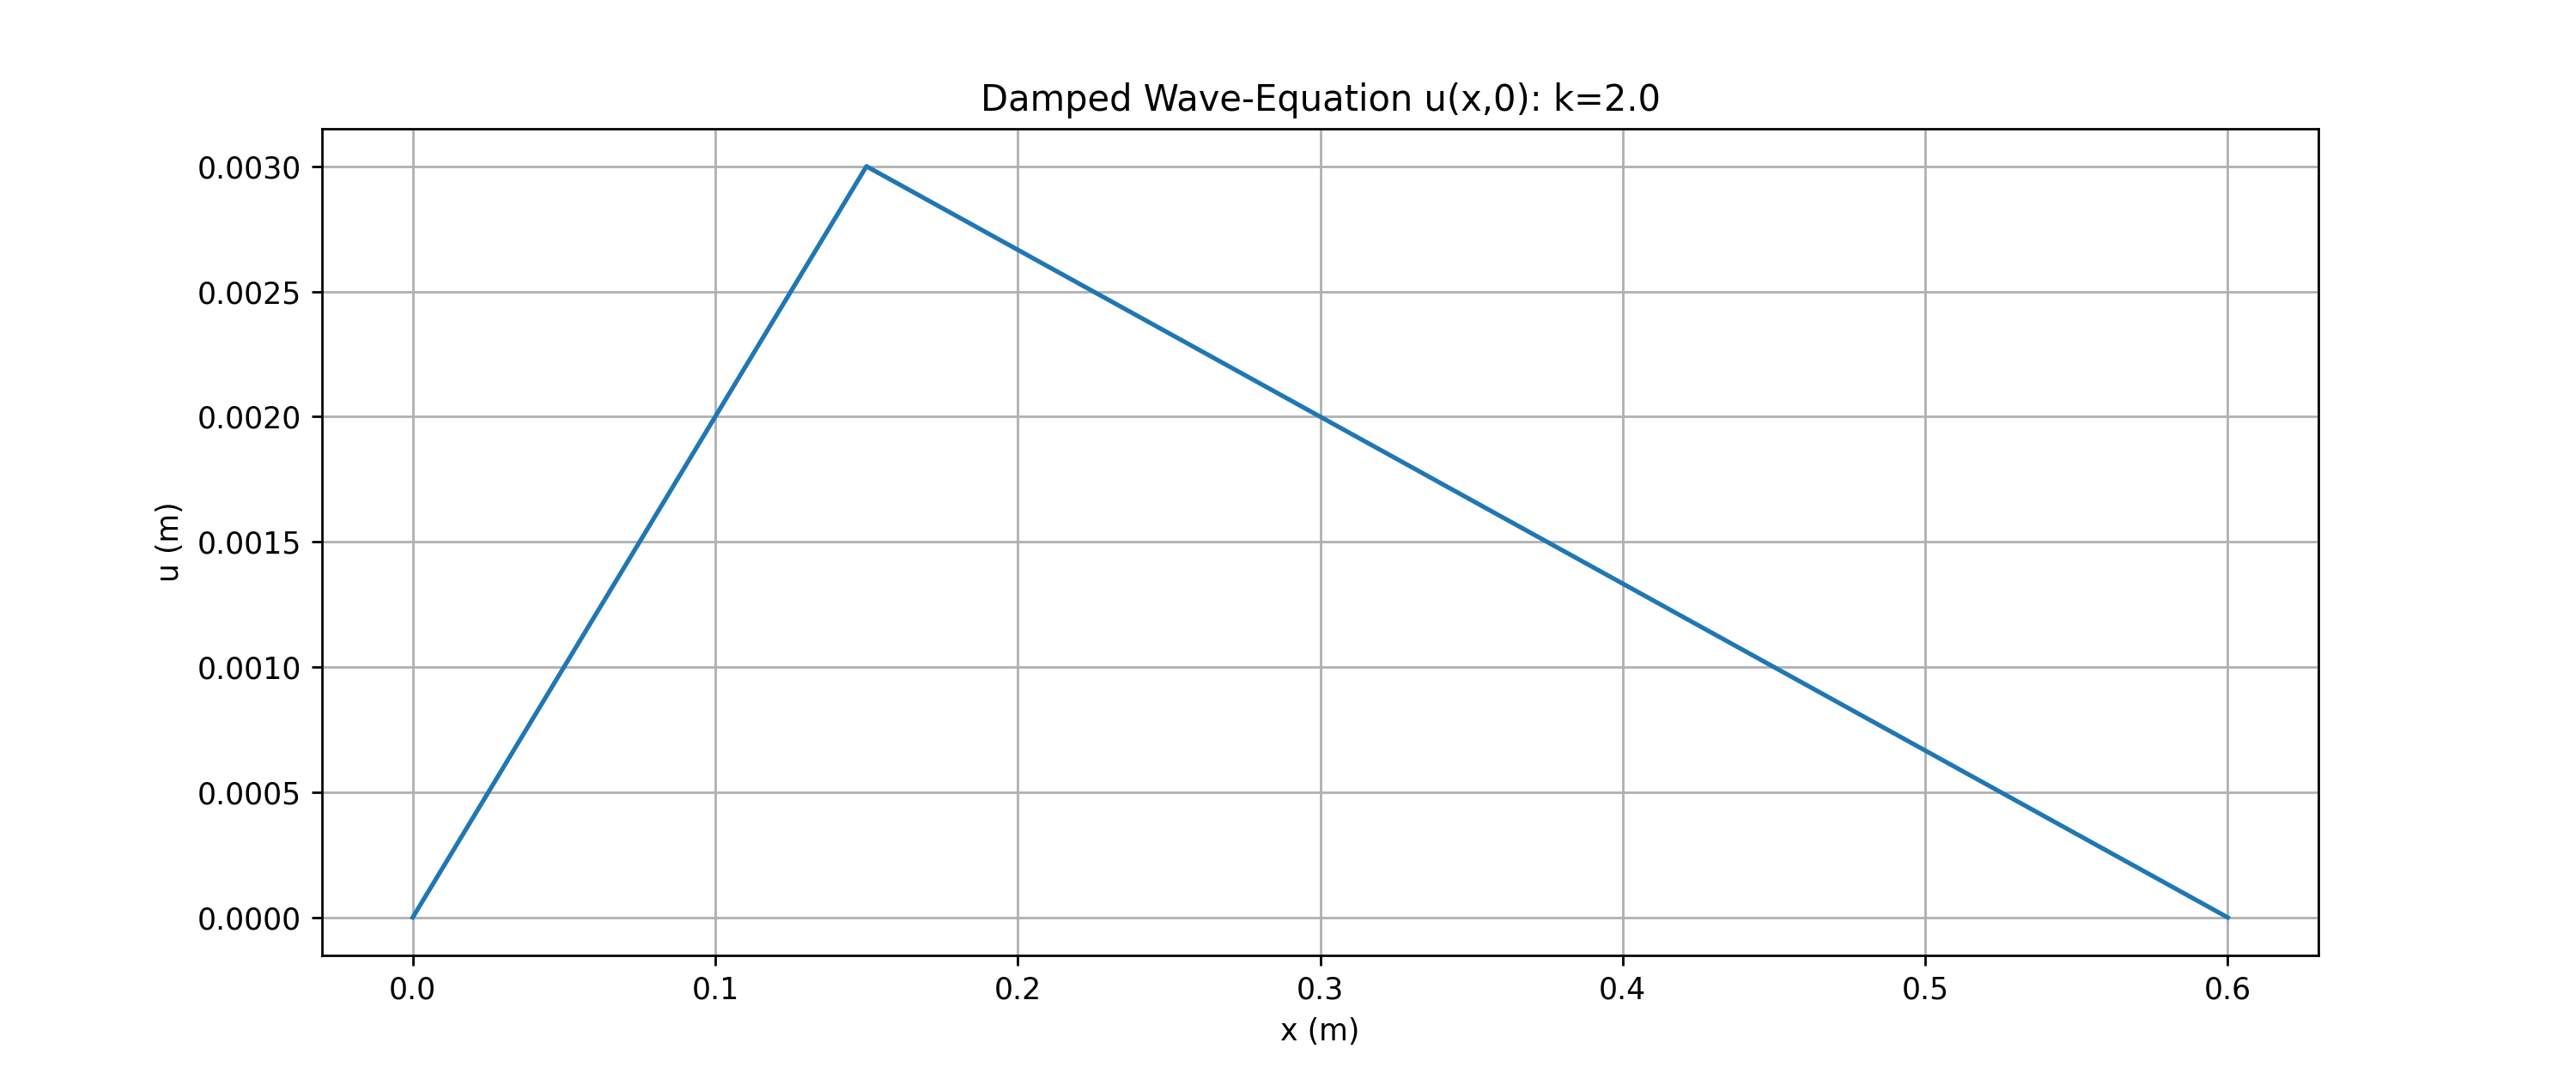

In [1]:
# Define initial velocity and position function
import numpy as np 
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from matplotlib import animation 
%matplotlib notebook

# Define parameters
A = 0.003  
x0=.15
L = 0.6         # Length of the string
wavelength=2*L
dx = 0.001      # Spatial step size
c = 396.0       # Wave speed
k = 2.0         # Damping factor
T = 2.0      # Total simulation time
fs = 44100     # Sampling rate
v=396.0
dt = 1/fs       # Time step size
freq=v/wavelength

# Define initial conditions
def initial_disp(x,x0,A):
    return np.where(x < x0, x/x0*A, (L-x)/(L-x0)*A)

def initial_vel(x):
    return np.zeros_like(x)

# Define damped wave equation
def damped_wave(t, y):
    u, v = y
    du_dt = v
    dv_dt = c**2*np.diff(u,2)/np.diff(x,2) - k*v
    dv_dt = np.concatenate(([0], dv_dt, [0]))
    return [du_dt, dv_dt]

print(f"frequency is: {freq}\n")
# Define grid
x = np.arange(0, L+dx, dx)
N=x.size

u0 = initial_disp(x,x0,A)
v0 = initial_vel(x)
plt.figure(figsize=(12,5))
plt.plot(x,u0)
plt.grid('--')
plt.title("Damped Wave-Equation u(x,0): k=2.0")
plt.xlabel("x (m)")
plt.ylabel("u (m)")
plt.show()

_______________________________________________________________________
Part b: (5 pts)

- set up the problem for solve_ivp
- Solve the equation for $u(x,t)$


In [2]:
Laplacian=((np.diag(-2*np.ones(N)))+np.diag(np.ones(N-1),1)+np.diag(np.ones(N-1),-1))/(dx**2)

def damped_wave(t, u):
    """
    
    u[0] = u(x[0])
    u[1] = u(x[1])
    :
    :
    u[N-1] = u(x[N-1])
    u[N] = d(u[0])/dt
    u[N+1] = d(u[1])/dt
    :
    :
    u[2N-1] = d(u[N-1])/dt
    
    
    Here is where we return the first derivatives in time
    
    which for the first N points is:
    
    du[:N]/dt   or du[:N]=u[N:]
    
    and for the second N points is:
    
    du[N:]/dt = d^2u[:N]/dt^2 = v^2*Laplacian . u[:N] or du[N:]= v^2*Laplacian . u[:N]
    
    i.e.
    
    du[0]/dt = d(u[0])/dt = u[N]
    du[1]/dt = d(u[1])/dt = u[N+1]
    :
    :
    du[N]/dt = d^2(u[0])/dt^2 = (v^2*Laplacian . u[:N])[0]
    du[N+1]/dt = d^2(u[1])/dt^2 = (v^2*Laplacian . u[:N])[1]
    :
    :
    
    
    like for 2nd order ode's were we had 1,2,...n coordinates and then their derivatives to give 2n
    first derivatives we now have a large N points in x and then N derivatives to give 2N total
    first derivatives. The first N in the returned solution array are sol.y[:N,i] are the x-position points
    at time sol.t[i]
    """
    du=np.zeros(2*N)  #set up array of twice the size of the number of grid points
    
    u[0]=0   #BC fixed string
    u[N-1]=0 #BC fixed string
    
    du[:N]=u[N:] #first N first derivatives are the upper N of the u array 
    du[0]=0  #BC fixed string
    du[N-1]=0  #BC fixed string
    
    #first time derivative of upper half N points=2nd derivative = v**2 x lapacian_matrix x u-array
    du[N:]=   v**2 * Laplacian.dot(u[:N])-k*u[N:]
    du[N]=0  #BC fixed string
    du[-1]=0  #BC fixed string
    return du

U0=np.zeros(2*N)
U0[:N]=u0
U0[N:]=v0
t_eval=np.arange(0, T+dt, dt)
print("start...")
sol = solve_ivp(damped_wave, t_span=[0, T], y0=U0, t_eval=t_eval,method='RK23')
print(sol)
print("end")

start...
  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  2.268e-05 ...  2.000e+00  2.000e+00]
        y: [[ 0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]
            [ 2.000e-05  2.000e-05 ...  3.085e-06  2.806e-06]
            ...
            [ 0.000e+00 -5.454e-15 ...  7.761e-03  4.355e-03]
            [ 0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]]
      sol: None
 t_events: None
 y_events: None
     nfev: 3993176
     njev: 0
      nlu: 0
end


Part c: (4 pts)

- Make an animation of $u(x,t)$

<IPython.core.display.Javascript object>


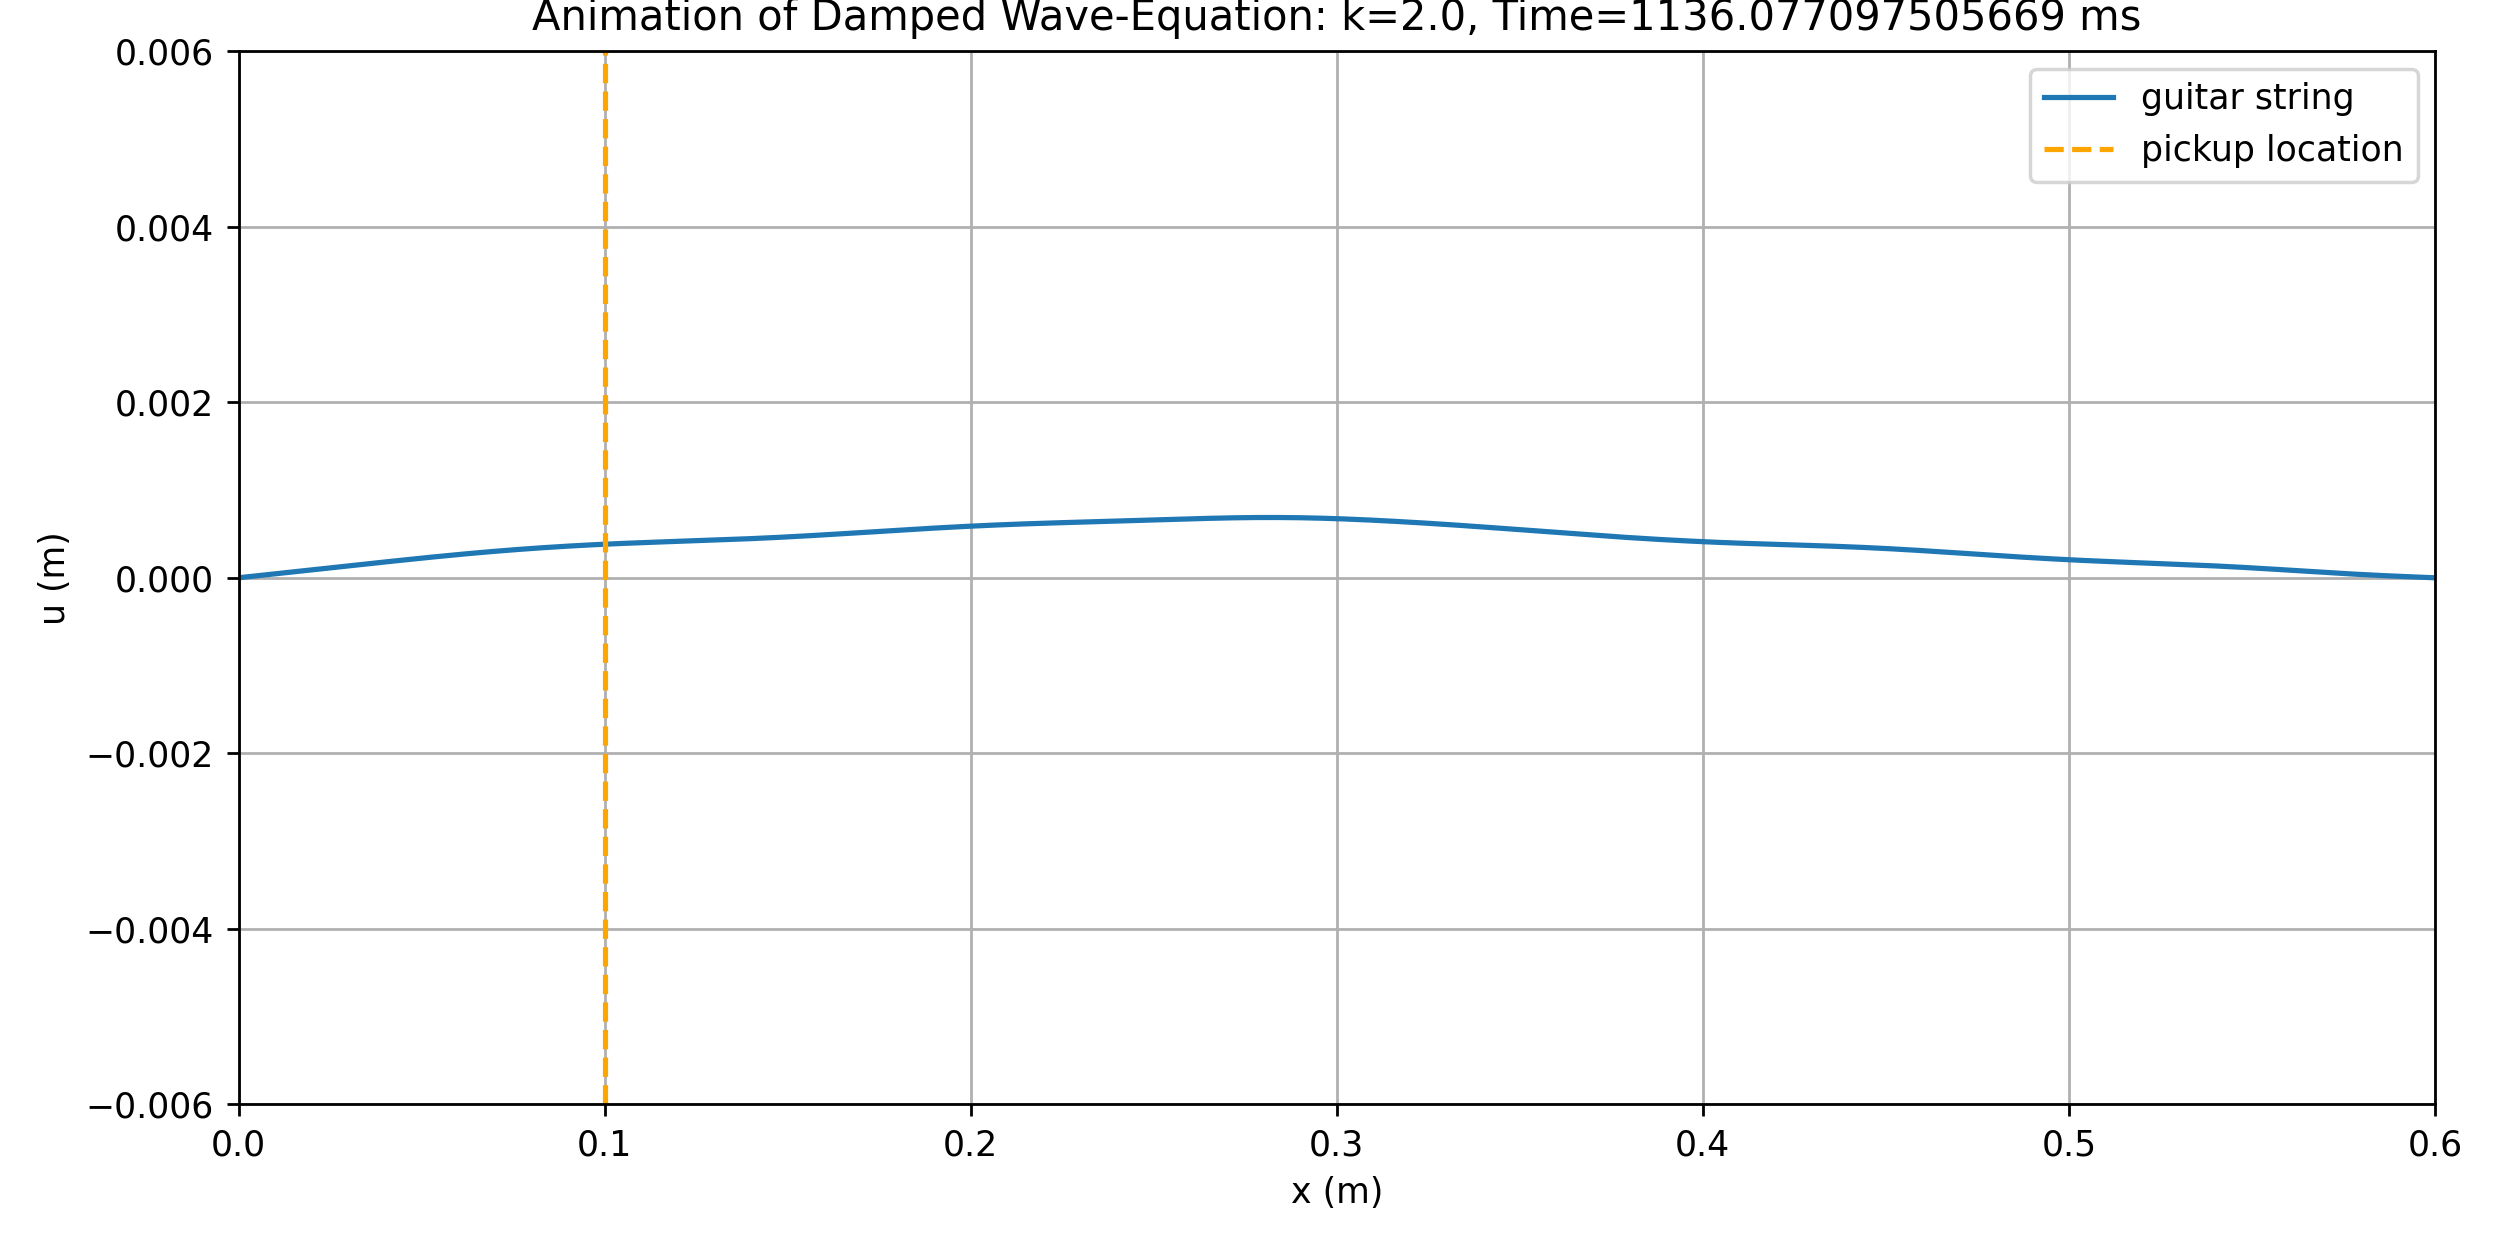

In [3]:
# Your code...
"sol.y[:N,i]=u-displacement at time t"
fig=plt.figure(figsize=(10,5))

ax1=plt.subplot(1,1,1)

ax1.set_xlim(0,.6)
ax1.set_ylim(-2*A,2*A)
ax1.set_xlabel('x (m)')
ax1.set_ylabel('u (m)')
line1,=ax1.plot([],[],label='guitar string')
ax1.axvline([.1],linestyle='--',color='orange',label='pickup location')
title=ax1.set_title('')
ax1.legend()

def init():
    line1.set_data([],[])
    return line1,

def animate(i):
    line1.set_data(x,sol.y[:N,i])
    title.set_text(f'Animation of Damped Wave-Equation: k=2.0, Time={1000*sol.t[i]} ms')
    return line1,

anim=animation.FuncAnimation(fig,animate,init_func=init,frames=len(sol.t),interval=10, blit=True)

plt.grid('--')
plt.tight_layout()
plt.show()

Part d: (5 pts)


Finally, a waveform signal $S(t)$ is generated by sampling the amplitude of the string at a certain fixed location that is meant to model something like an electric guitar pickup. That is

$S(t) = u(x_{pickup},t)$

- compute $S(t)$ for $x_{pickup}=0.1$ m
- display $S(t)$ vs $t$ for $0 \leq t \leq 0.1$ s
- display $S(t)$ vs $t$ for $0 \leq t \leq 2$ s
- display the magnitude of the Fourier Transform $|G(f)|$ for $0 \leq f \leq 2000$ Hz

pickup position= 0.1 at position= 100
Delta f per bin= 0.49999433113003255


<IPython.core.display.Javascript object>


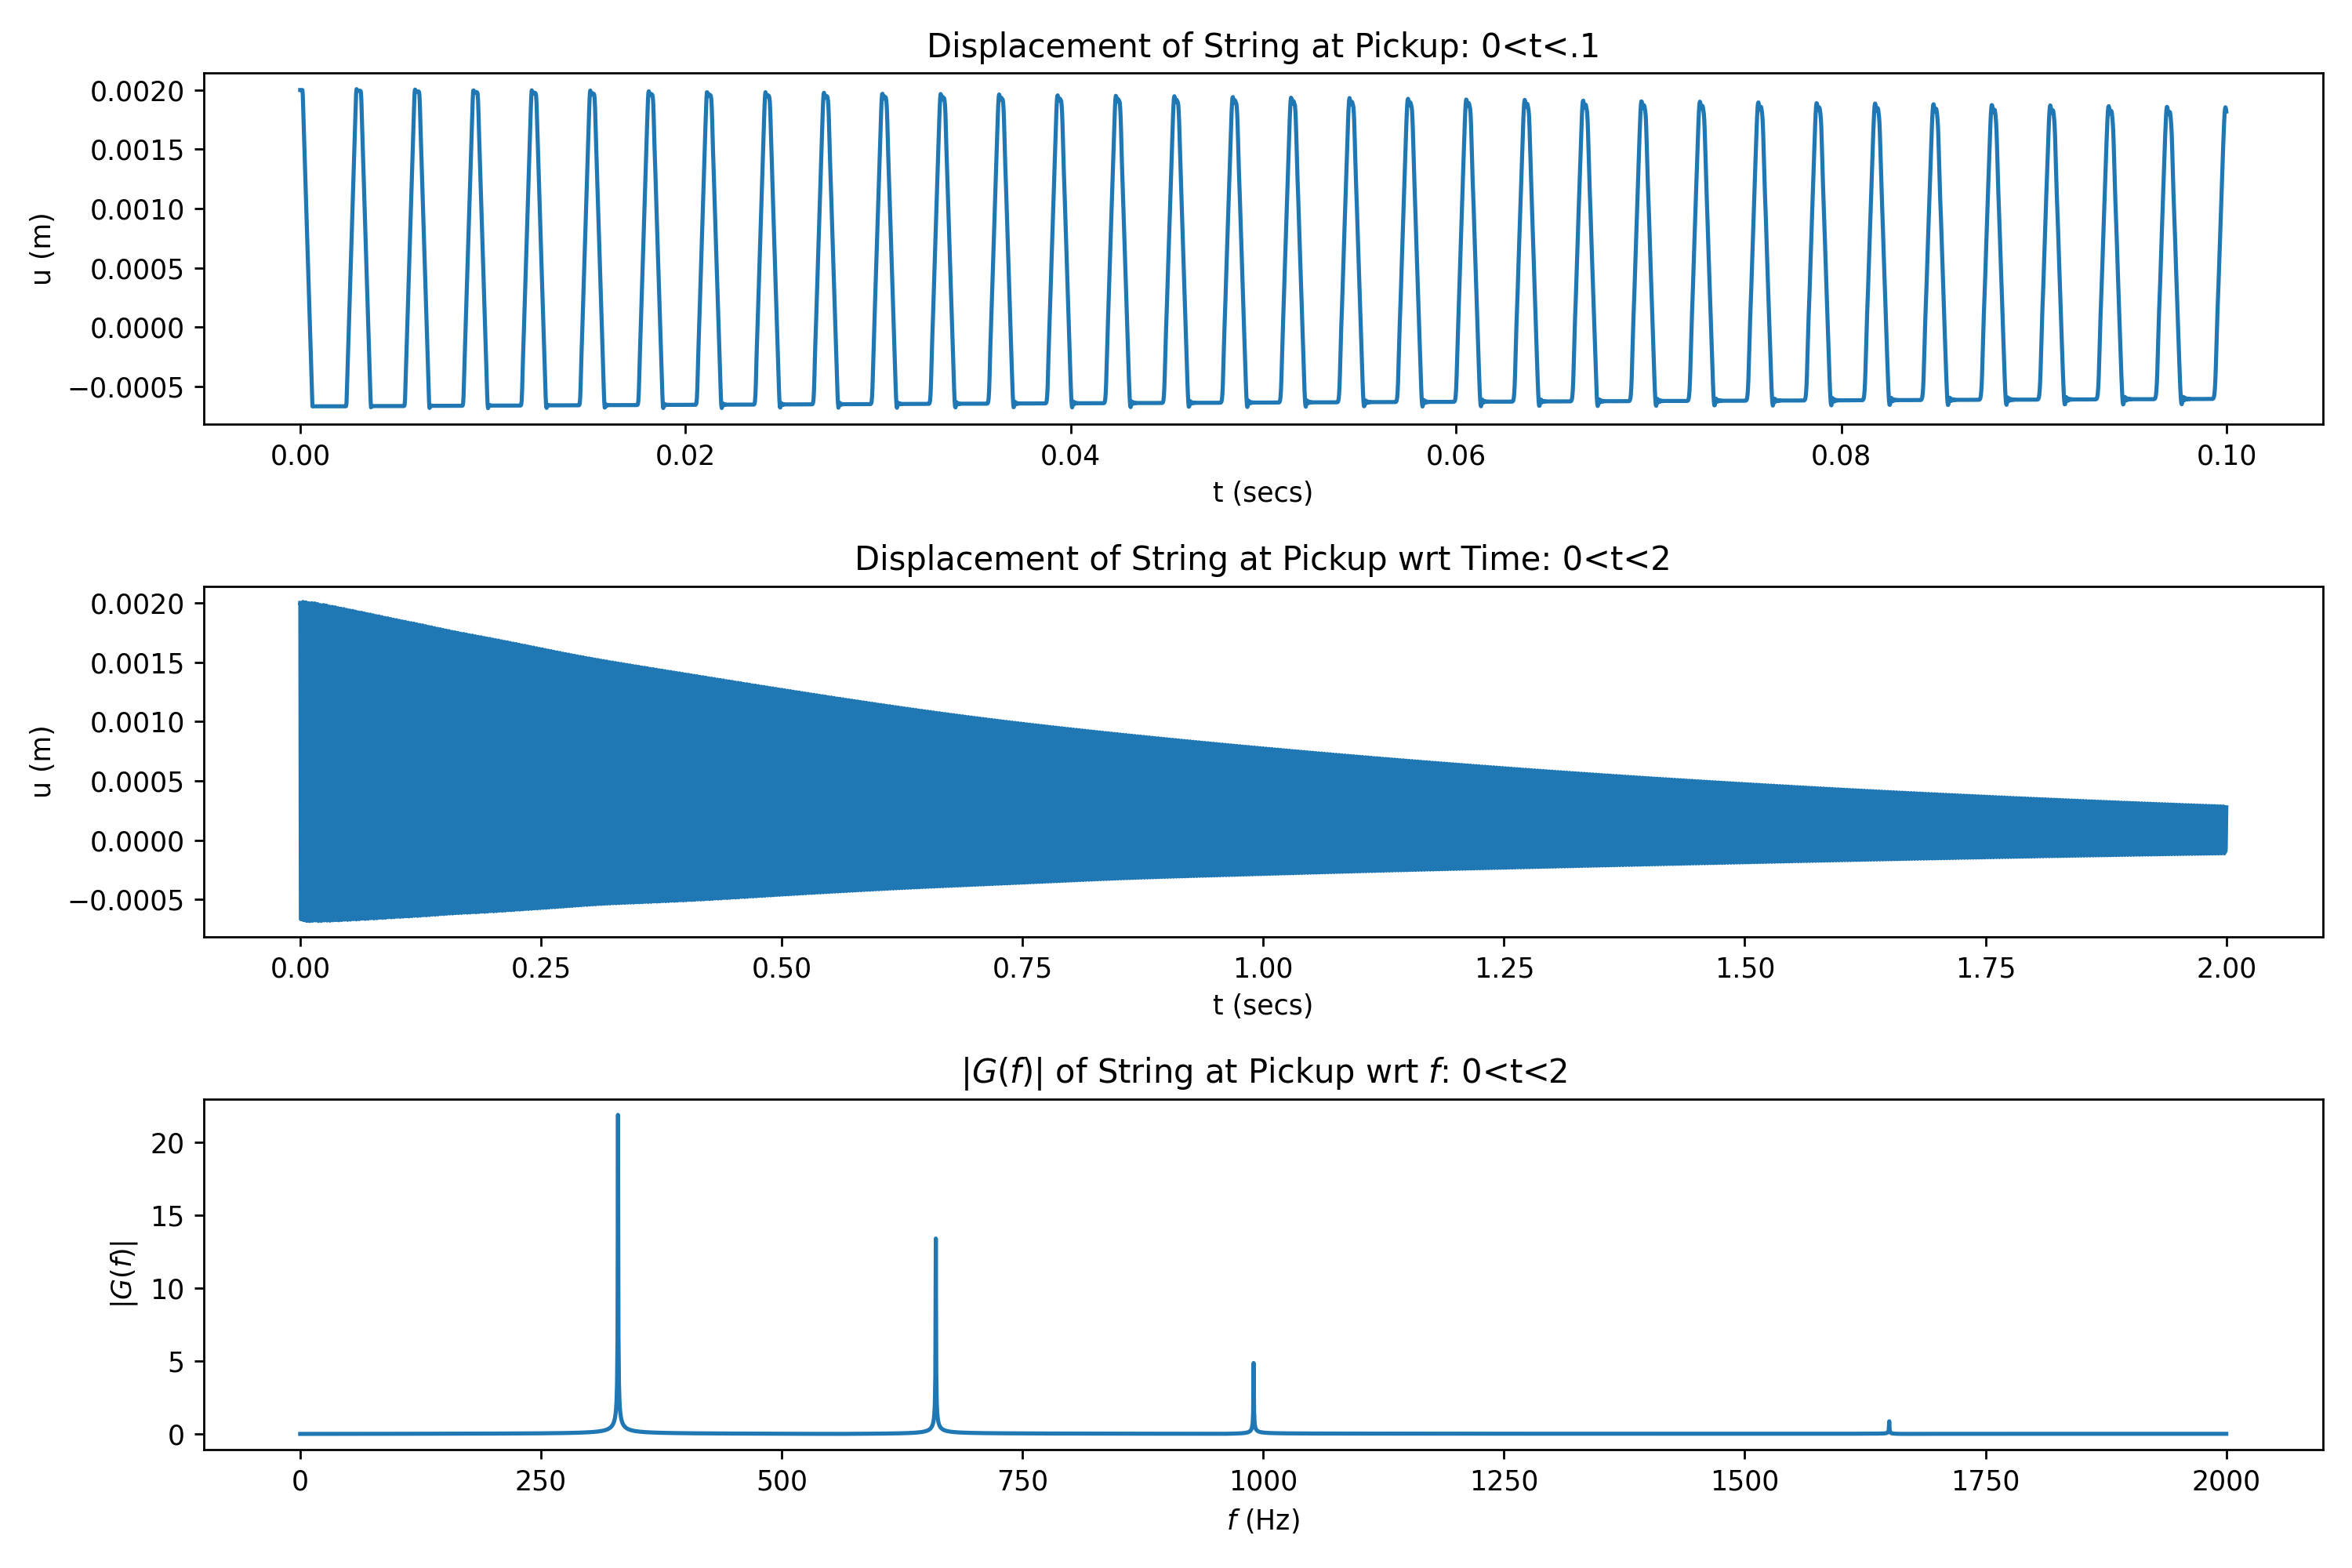

In [4]:
# Your code...
sample_time=1/44100 

##pickup 
x_pickup=.1
N_pickup=int((N*x_pickup)/L)

print('pickup position=',x_pickup, 'at position=',N_pickup)

signal=sol.y[N_pickup,:] ## S(t)

F_spectrum=np.fft.rfft(signal)
freq=np.fft.rfftfreq(t_eval.size,sample_time)

print('Delta f per bin=',freq[1]-freq[0])

plt.figure(figsize=(12,8))
plt.subplot(3,1,1)
plt.plot(t_eval[t_eval<.1],signal[t_eval<.1])
plt.xlabel('t (secs)')
plt.ylabel('u (m)')
plt.title('Displacement of String at Pickup: 0<t<.1')
plt.show()


plt.subplot(3,1,2)
plt.plot(t_eval[t_eval<2],signal[t_eval<2])
plt.xlabel('t (secs)')
plt.ylabel('u (m)')
plt.title('Displacement of String at Pickup wrt Time: 0<t<2')
plt.show()

f_max=2000

plt.subplot(3,1,3)
plt.plot(freq[freq<f_max],np.absolute(F_spectrum[freq<f_max]))
plt.xlabel(r'$f$ (Hz)')
plt.ylabel(r'$|G(f)|$')
plt.title(r'$|G(f)|$ of String at Pickup wrt $f$: 0<t<2')
plt.tight_layout()
plt.show()

___________________________________________________________________________
Part e: (1 pt)

Play the audio of the signal at the pickup $S(t)$

In [5]:
from IPython.display import Audio

Audio(signal,rate=fs)

____________________________________________________________________________
Observations:

In this lab we produced a numerical solution to the damped wave equation in 1-d. Such an equation models , for instance, the displacement of a string on an instrument, say a guitar string , where the displacement of the longitudinal waves causes changes in air pressure, pressure gradients which processed by the human ear and brain produce sound. For the model, we assumed that the damping factor was k=2, that the string was .6 meters long (therefore wavelength was .6m), the wave speed was 396 m/s, the sampling time 44100 Hz and therefore the frequency was around 330 Hz. The original shape of the wave was taken to be triangular, with peak at .15 m, representing a sudden pluck at a certain point on the string. 

First, we simply initialized and displayed the initial wave function at t=0. The initial waves was then plotted, u (displacement) vrs. x. Then we calculated the frequency as v/fs where fs=1/wavelength. Next, we utilized space-centered finite difference and used solve_ivp to solve the equation in the regie 0<x<.6 meter and 0<t<2.0 seconds. The next step was to animate the solution as a function of time, a frame representing the string throughout space at a time t. The triangular wave did not move sinusoidally, despite the fact that the modes are in fact sinusoidal, and moved in a rather complicated way which was not the combination of left and right moving waves. We positioned a "pickup" at a point .1 m. The line at .1 m models a pickup in an electric guitar. The displacement amplitude across time at that position .1 gives a signal registered by the pickup. Graphing this displacement across a finite time where decay was not dominant, we saw an oscillatory behavior, across all time we see precisely a decay of the amplitude which is caused by the damping. We performed an FFT to register the amplitudes in $f$-space and found it centered around certain amplitudes in frequency space. Those frequency amplitudes correspond to the the frequencies for an E note, and there were also harmonics of that note in the $f$-space, though they had lower amplitude in the "mix" of the signal. In converting this signal into a sound, we precisely hear an E note for the duration of the time the equation was solved for. 

There are many different initial conditions that could have been varied. Increasing the damping with the same time would lead to faster decay of the signal. Increasing the speed and wavelength would give us a different frequency. A different initial condition displacement and velocity would cause different behavior in the dynamics of the "string". For instance, when the initial wave is triangular and the mass peak is symmetrically placed, we get a more symmetric wave motion almost as if the wave were composed of a right and left moving wave. A different pickup position would given the conditions stipulated above, register different frequencies over time, we could record different notes with these variations. Overall, the following simulation allows us to solve for complex initial conditions for damped wave motion, and we could easily generalize to multiple strings simply by superposing the solutions we get (assuming the wave motion of one string does not effect the others,a tenuous assumption).
____________________________________________________________________________